# Calculate microstate pKa values

Code and more documentation at:
https://github.com/mayrf/pkasolver

In [11]:
import pkasolver
from os import path
from rdkit import Chem
from pkasolver.query import calculate_microstate_pka_values, draw_pka_reactions, QueryModel
from IPython.display import display
from equilibrator_api import ComponentContribution
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd

In [2]:
cc = ComponentContribution()

[zenodo.py:181 - get_cached_filepath()] Validate the cached copy using MD5 checksum '9b66b85a886926d09755a66a3b452b6b'.
[zenodo.py:181 - get_cached_filepath()] Validate the cached copy using MD5 checksum 'd20c72a47fe934228a6be9f4e49f96e4'.


In [16]:
query_model = QueryModel()

#cids = [f"kegg:C{i:05d}" for i in range(1, 5)]
cids = ["bigg.metabolite:ac", "bigg.metabolite:succ", "bigg.metabolite:pyr", "bigg.metabolite:glu__L"]

data = []
for cid in tqdm(cids):
    cpd = cc.ccache.get_compound(cid)
    if cpd is None or cpd.inchi is None:
        continue
    mol = Chem.MolFromInchi(cpd.inchi)
    protonation_states = calculate_microstate_pka_values(mol, only_dimorphite=False)
    pkasolver_pkas = [state.pka for state in protonation_states]

    data.append((cid, cpd.get_common_name(), protonation_states[0].ph7_mol, pkasolver_pkas, cpd.dissociation_constants, ))

result_df = pd.DataFrame(data=data, columns=["compound_id", "compound_name", "ph7_mol",  "pka_pkasolver", "pka_cxcalc"])

  0%|          | 0/4 [00:00<?, ?it/s]

[query.py:297 - calculate_microstate_pka_values()] Using dimorphite-dl to identify protonation sites.
[query.py:311 - calculate_microstate_pka_values()] Proposed mol at pH 7.4: CC(=O)[O-]
[query.py:297 - calculate_microstate_pka_values()] Using dimorphite-dl to identify protonation sites.
[query.py:311 - calculate_microstate_pka_values()] Proposed mol at pH 7.4: O=C([O-])CCC(=O)[O-]
[query.py:297 - calculate_microstate_pka_values()] Using dimorphite-dl to identify protonation sites.
[query.py:311 - calculate_microstate_pka_values()] Proposed mol at pH 7.4: CC(=O)C(=O)[O-]
[query.py:297 - calculate_microstate_pka_values()] Using dimorphite-dl to identify protonation sites.
[query.py:311 - calculate_microstate_pka_values()] Proposed mol at pH 7.4: [NH3+][C@@H](CCC(=O)[O-])C(=O)[O-]


,compound_id,compound_name,ph7_mol,pka_pkasolver,pka_cxcalc
0,bigg.metabolite:ac,Acetate,,[4.194462308883667],[4.54]
1,bigg.metabolite:succ,Succinate,,"[4.162807598114013, 4.91568229675293]","[5.69, 3.55]"
2,bigg.metabolite:pyr,Pyruvate,,[2.4261293697357176],[2.93]
3,bigg.metabolite:glu__L,L-Glutamate,,"[3.9313722229003907, 4.784076662063598, 9.5092...","[9.54, 4.27, 1.88]"

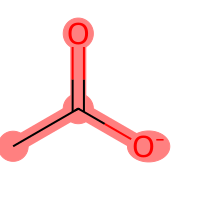
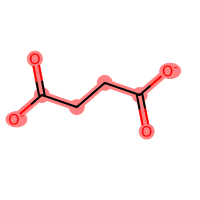
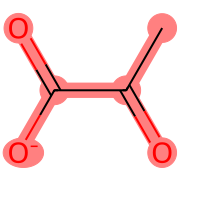
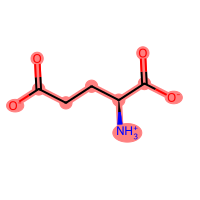

In [17]:
result_df